In [1]:
# import libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
data=pd.read_csv("C:/Users/admin/ML_Project/Credit_Card_fraud_detection/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.shape

(284807, 31)

In [4]:
#display first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Feature Scaling

 ##### We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [7]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
# Fit the data into scaler and transform
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
data['Amount'].describe()

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [11]:
data=data.drop(['Time'],axis=True)

In [12]:
data.shape

(284807, 30)

In [13]:
data.duplicated().any()

True

In [14]:
data=data.drop_duplicates()

In [15]:
data.shape

(275663, 30)

In [16]:
284807-275663

9144

In [17]:
# distribution of ligit & fraudulent transactions
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

** This data is highly imbalnced

0 --> Normal Transaction

1 --> Fraudulent Transaction

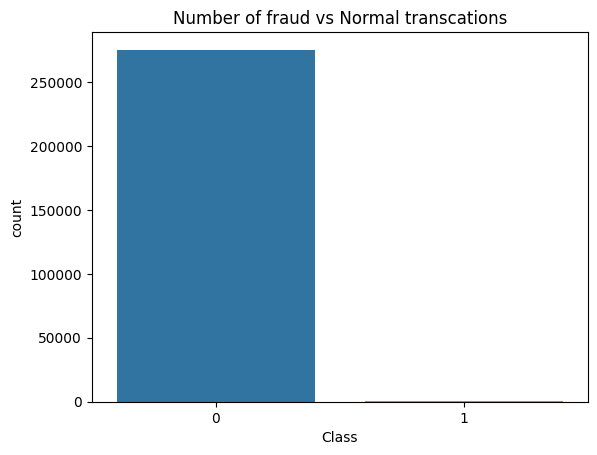

In [18]:
sns.countplot(x='Class', data=data)
plt.title('Number of fraud vs Normal transcations')
plt.show()

## Convert Imbalnced data into Balanced Data Using Over Sampling Method

In [19]:
# Here data is imbalanced so we use oversampling method tobalanced the data

In [20]:
#!pip install imblearn

In [21]:
# Seperating the data for analysis
ligit = data[data.Class == 0]
fraude = data[data.Class == 1]

In [22]:
print(ligit.shape)
print(fraude.shape)

(275190, 30)
(473, 30)


In [23]:
X=data.drop('Class',axis=1)

In [24]:
y=data['Class']

In [25]:
X.shape,y.shape

((275663, 29), (275663,))

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [28]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [29]:
X_res.shape,y_res.shape

((550380, 29), (550380,))

In [30]:
# we reduce the data in train_test_split(xtrain=20%,xtest=80%) due to memory problem of hardware

In [31]:
new_X=data.drop('Class',axis=1)

In [32]:
new_y=data['Class']

In [33]:
new_X.shape

(275663, 29)

In [34]:
X_train1,X_test1,y_train1,y_test1=train_test_split(new_X,new_y,test_size=0.8,random_state=42)

In [35]:
X_train1.shape,y_train1.shape

((55132, 29), (55132,))

In [36]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X_train1,y_train1,test_size=0.2,random_state=42)

In [37]:
X_test2.shape,y_test2.shape

((11027, 29), (11027,))

In [38]:
X_balanced,y_balanced=SMOTE().fit_resample(X_test2,y_test2)

In [39]:
X_balanced.shape,y_balanced.shape

((22012, 29), (22012,))

In [40]:
y_balanced.value_counts()

0    11006
1    11006
Name: Class, dtype: int64

In [41]:
#Split the data into Training the data & Testing the Data

Xtrain,Xtest,ytrain,ytest=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42)

In [42]:
X_balanced.shape,y_balanced.shape

((22012, 29), (22012,))

In [43]:
# Logistic Regression

In [44]:
# Build Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [45]:
# Get accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(Xtrain,ytrain)

pred = lr_model.predict(Xtest)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.9904610492845787
Confusion Matrics:
 [[2200   42]
 [   0 2161]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2242
           1       0.98      1.00      0.99      2161

    accuracy                           0.99      4403
   macro avg       0.99      0.99      0.99      4403
weighted avg       0.99      0.99      0.99      4403



In [47]:
# Random Forest

In [48]:
rfc_model = RandomForestClassifier()

rfc_model.fit(Xtrain,ytrain)

pred = lr_model.predict(Xtest)
pred_df=pd.DataFrame(pred)


ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)


Accuracy Score: 0.9904610492845787
Confusion Matrics:
 [[2200   42]
 [   0 2161]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2242
           1       0.98      1.00      0.99      2161

    accuracy                           0.99      4403
   macro avg       0.99      0.99      0.99      4403
weighted avg       0.99      0.99      0.99      4403



In [49]:
# Decision Tree

In [50]:
dtc_model = DecisionTreeClassifier()

dtc_model.fit(Xtrain,ytrain)

pred = dtc_model.predict(Xtest)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)

print("Classification Report:\n",cr)

Accuracy Score: 0.997728821258233
Confusion Matrics:
 [[2235    7]
 [   3 2158]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2242
           1       1.00      1.00      1.00      2161

    accuracy                           1.00      4403
   macro avg       1.00      1.00      1.00      4403
weighted avg       1.00      1.00      1.00      4403



In [51]:
# SVC model

In [52]:
svc_model = SVC()

svc_model.fit(Xtrain,ytrain)

pred = svc_model.predict(Xtest)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.9929593459005224
Confusion Matrics:
 [[2211   31]
 [   0 2161]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2242
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      4403
   macro avg       0.99      0.99      0.99      4403
weighted avg       0.99      0.99      0.99      4403



In [53]:
# Gaussian Naive Bayes model

In [54]:
gnb_model = GaussianNB()

gnb_model.fit(Xtrain,ytrain)

pred = gnb_model.predict(Xtest)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:",cr)

Accuracy Score: 0.8914376561435385
Confusion Matrics:
 [[2177   65]
 [ 413 1748]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2242
           1       0.96      0.81      0.88      2161

    accuracy                           0.89      4403
   macro avg       0.90      0.89      0.89      4403
weighted avg       0.90      0.89      0.89      4403



# Feature Selection

### Feature selction using Random Forest Importance Method

In [55]:
#data.head()

In [56]:
#X=data.drop('Class',axis=1)

In [57]:
#y=data['Class']

In [58]:
#Split the data into Training the data & Testing the Data
Xtrain,Xtest,ytrain,ytest=train_test_split(X_balanced,y_balanced,test_size=0.2,random_state=42)

In [59]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1))
sel.fit(Xtrain,ytrain)
sel.get_support()

array([False, False, False,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [60]:
Xtrain.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [61]:
features=Xtrain.columns[sel.get_support()]

In [62]:
features

Index(['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [63]:
len(features)

8

In [64]:
np.mean(sel.estimator_.feature_importances_)

0.034482758620689655

In [65]:
sel.estimator_.feature_importances_

array([0.01611689, 0.01575211, 0.02391516, 0.06923732, 0.01149297,
       0.00747297, 0.04800656, 0.01050097, 0.01071535, 0.12623923,
       0.04871604, 0.06785248, 0.00695807, 0.28528744, 0.00619235,
       0.04656239, 0.06574067, 0.01968784, 0.00398971, 0.00769291,
       0.01108967, 0.00944513, 0.00803856, 0.00462351, 0.00699062,
       0.00320321, 0.03069315, 0.02012695, 0.00765978])

In [66]:
Xtrain_rfc=sel.transform(Xtrain)
Xtest_rfc=sel.transform(Xtest)

In [67]:
def run_RandomForest(Xtrain,Xtest,ytrain,ytest):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(Xtrain,ytrain)
    y_pred=clf.predict(Xtest)
    print("Accuracy : ",accuracy_score(ytest,y_pred))

In [68]:
%%time
run_RandomForest(Xtrain_rfc,Xtest_rfc,ytrain,ytest)

Accuracy :  0.9988644106291165
CPU times: total: 3.95 s
Wall time: 2.23 s


In [69]:
%%time
run_RandomForest(Xtrain,Xtest,ytrain,ytest)

Accuracy :  1.0
CPU times: total: 9.69 s
Wall time: 5.09 s


In [70]:
def run_DecisionTreeClassifier(Xtrain,Xtest,ytrain,ytest):
    dtc=DecisionTreeClassifier(random_state=0)
    dtc.fit(Xtrain,ytrain)
    y_pred=dtc.predict(Xtest)
    print("Accuracy : ",accuracy_score(ytest,y_pred))

In [71]:
%%time
run_DecisionTreeClassifier(Xtrain_rfc,Xtest_rfc,ytrain,ytest)

Accuracy :  0.9965932318873495
CPU times: total: 203 ms
Wall time: 222 ms


In [72]:
%%time
run_DecisionTreeClassifier(Xtrain,Xtest,ytrain,ytest)

Accuracy :  0.997728821258233
CPU times: total: 1.08 s
Wall time: 1.11 s


In [73]:
def run_LogisticRegression(Xtrain,Xtest,ytrain,ytest):
    lg=LogisticRegression(C=0.01)
    lg.fit(Xtrain,ytrain)
    y_pred=lg.predict(Xtest)
    print("Accuracy : ",accuracy_score(ytest,y_pred))

In [74]:
%%time
run_LogisticRegression(Xtrain_rfc,Xtest_rfc,ytrain,ytest)

Accuracy :  0.9543493072904837
CPU times: total: 78.1 ms
Wall time: 191 ms


In [75]:
%%time
run_LogisticRegression(Xtrain,Xtest,ytrain,ytest)

Accuracy :  0.9795593913240972
CPU times: total: 234 ms
Wall time: 213 ms


In [76]:
def run_SVC(Xtrain,Xtest,ytrain,ytest):
    sv=SVC()
    sv.fit(Xtrain,ytrain)
    y_pred=sv.predict(Xtest)
    print("Accuracy : ",accuracy_score(ytest,y_pred))

In [77]:
%%time
run_SVC(Xtrain_rfc,Xtest_rfc,ytrain,ytest)

Accuracy :  0.980467862820804
CPU times: total: 7.17 s
Wall time: 7.77 s


In [78]:
%%time
run_SVC(Xtrain,Xtest,ytrain,ytest)

Accuracy :  0.9929593459005224
CPU times: total: 6.66 s
Wall time: 7.31 s


In [79]:
def run_GNB(Xtrain,Xtest,ytrain,ytest):
    gnb=GaussianNB()
    gnb.fit(Xtrain,ytrain)
    y_pred=gnb.predict(Xtest)
    print("Accuracy : ",accuracy_score(ytest,y_pred))

In [80]:
%%time
run_GNB(Xtrain_rfc,Xtest_rfc,ytrain,ytest)

Accuracy :  0.9034749034749034
CPU times: total: 0 ns
Wall time: 65 ms


In [81]:
%%time
run_GNB(Xtrain,Xtest,ytrain,ytest)

Accuracy :  0.8914376561435385
CPU times: total: 46.9 ms
Wall time: 103 ms


### Feature selection using Pearson Correlation Method

#### Check the pearson correlation on "X_train" data only

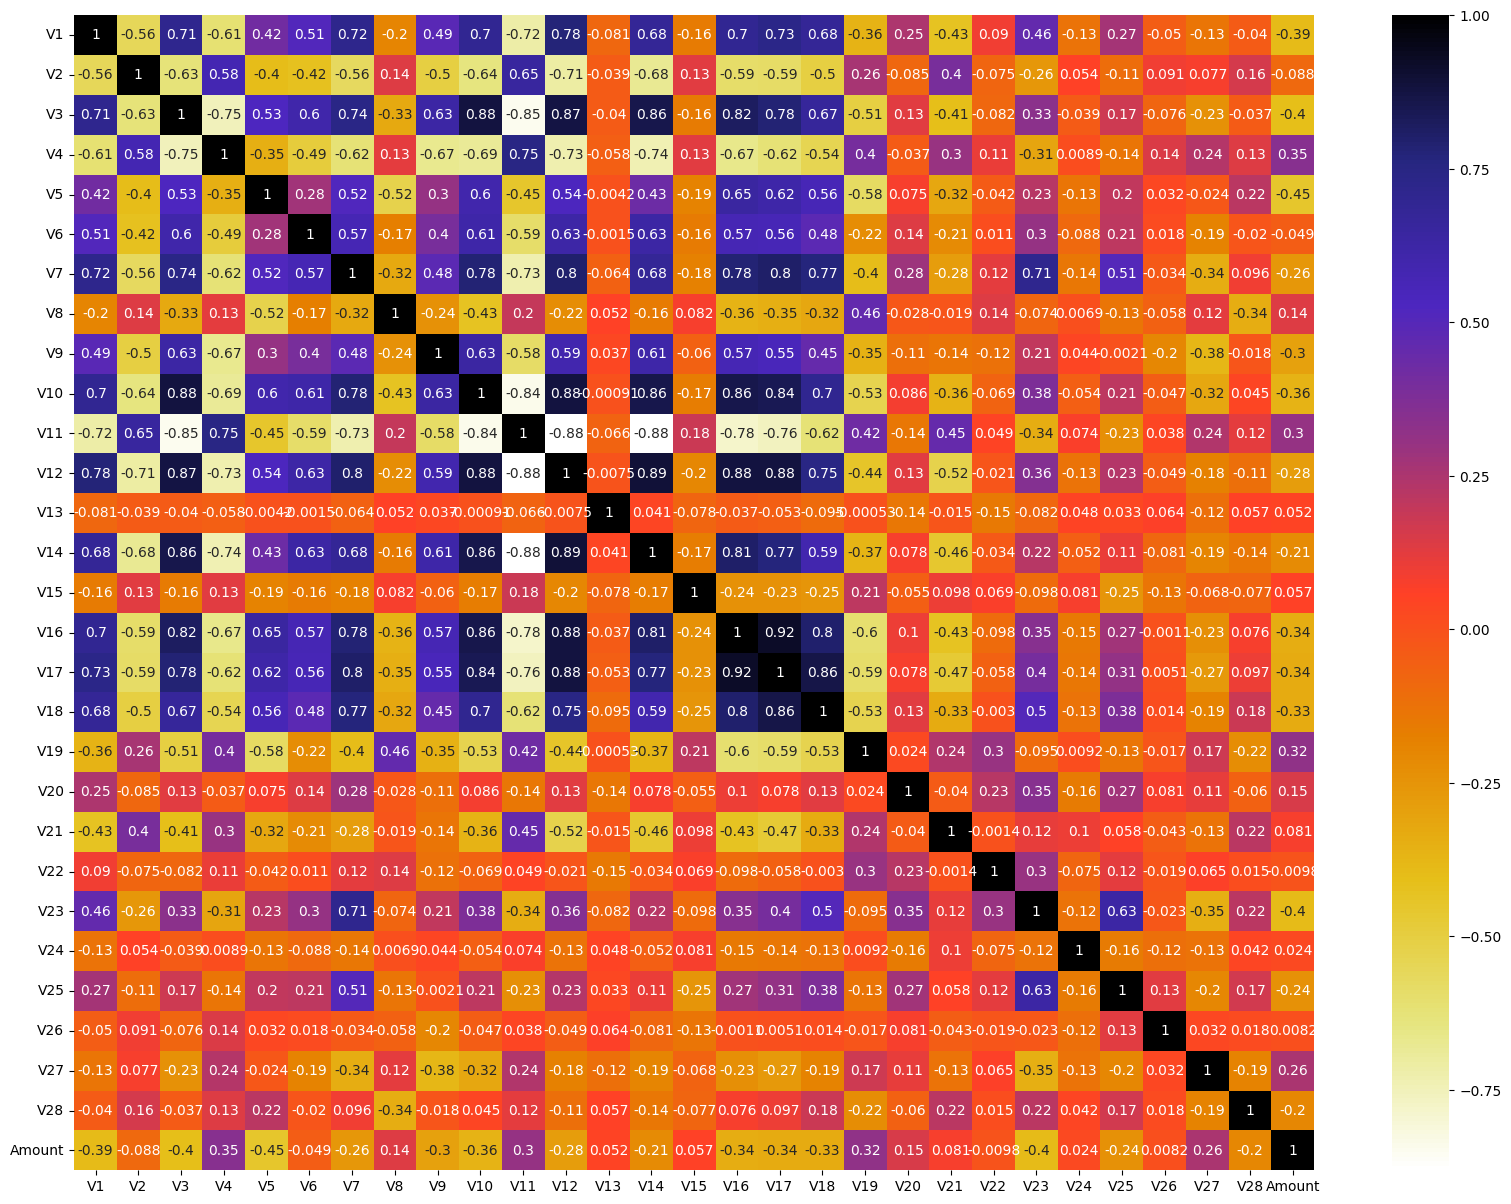

In [82]:
plt.figure(figsize=(20,15))
cor=Xtrain.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### Select highly correlated features

This correlation function will remove the first correlated features that is correlated with other features

In [83]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [84]:
corr_features=correlation(Xtrain,0.1)
print("correlated Features : ",len(set(corr_features)))

correlated Features :  26


In [85]:
print("correlated Features : ",corr_features)

correlated Features :  {'V22', 'V16', 'Amount', 'V7', 'V5', 'V12', 'V28', 'V3', 'V19', 'V27', 'V23', 'V24', 'V6', 'V11', 'V15', 'V17', 'V10', 'V26', 'V20', 'V8', 'V14', 'V18', 'V25', 'V9', 'V4', 'V21'}


In [86]:
X_train_noncorr=Xtrain.drop(corr_features,axis=1)

In [87]:
X_train_noncorr.shape

(17609, 3)

In [88]:
X_test_noncorr=Xtest.drop(corr_features,axis=1)

In [89]:
X_test_noncorr.shape

(4403, 3)

# After features selction apply models

In [90]:
lr_model = LogisticRegression()

lr_model.fit(X_train_noncorr,ytrain)

pred = lr_model.predict(X_test_noncorr)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.7344992050874404
Confusion Matrics:
 [[1685  557]
 [ 612 1549]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      2242
           1       0.74      0.72      0.73      2161

    accuracy                           0.73      4403
   macro avg       0.73      0.73      0.73      4403
weighted avg       0.73      0.73      0.73      4403



In [91]:
rfc_model = RandomForestClassifier()

rfc_model.fit(X_train_noncorr,ytrain)

pred = rfc_model.predict(X_test_noncorr)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.9600272541449012
Confusion Matrics:
 [[2101  141]
 [  35 2126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2242
           1       0.94      0.98      0.96      2161

    accuracy                           0.96      4403
   macro avg       0.96      0.96      0.96      4403
weighted avg       0.96      0.96      0.96      4403



In [92]:
dtc_model = DecisionTreeClassifier()

dtc_model.fit(X_train_noncorr,ytrain)

pred = dtc_model.predict(X_test_noncorr)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.9423120599591188
Confusion Matrics:
 [[2081  161]
 [  93 2068]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2242
           1       0.93      0.96      0.94      2161

    accuracy                           0.94      4403
   macro avg       0.94      0.94      0.94      4403
weighted avg       0.94      0.94      0.94      4403



In [93]:
svc_model = SVC()

svc_model.fit(X_train_noncorr,ytrain)

pred = svc_model.predict(X_test_noncorr)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:\n",cr)

Accuracy Score: 0.7803770156711333
Confusion Matrics:
 [[2046  196]
 [ 771 1390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      2242
           1       0.88      0.64      0.74      2161

    accuracy                           0.78      4403
   macro avg       0.80      0.78      0.78      4403
weighted avg       0.80      0.78      0.78      4403



In [94]:
gnb_model = GaussianNB()

gnb_model.fit(X_train_noncorr,ytrain)

pred = gnb_model.predict(X_test_noncorr)
pred_df=pd.DataFrame(pred)

ac = accuracy_score(ytest,pred_df)
cm = confusion_matrix(ytest,pred_df)
cr = classification_report(ytest,pred_df)
print("Accuracy Score:",ac)
print("Confusion Matrics:\n",cm)
print("Classification Report:",cr)

Accuracy Score: 0.7578923461276402
Confusion Matrics:
 [[2018  224]
 [ 842 1319]]
Classification Report:               precision    recall  f1-score   support

           0       0.71      0.90      0.79      2242
           1       0.85      0.61      0.71      2161

    accuracy                           0.76      4403
   macro avg       0.78      0.76      0.75      4403
weighted avg       0.78      0.76      0.75      4403



In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

In [96]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [98]:
# pd.set_option('display.max_rows',None)
# data

In [ ]:
#! pip install mysql-connector-python

In [99]:
# import all the libraries
import mysql.connector

ModuleNotFoundError: No module named 'mysql'

In [100]:
# connect to the database
connection = 



SyntaxError: invalid syntax (3255906488.py, line 2)